In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data cleaning
sheets_dict = pd.read_excel("Data_for_project.xlsx", sheet_name=None)
df_usd = pd.read_excel("Data_with_usd.xlsx", sheet_name='USD')

# Access each DataFrame using the sheet name as key
df_aus = sheets_dict['AUD']
df_cad = sheets_dict['CAD']
df_chf = sheets_dict['CHF']
df_usd_10 = sheets_dict['USD']


def clean_df(df):
    df.columns = df.iloc[2]
    df = df.drop(df.index[:3])
    df = df.drop(df.index[:2])
    df = df.rename(columns={df.columns[0]: 'Timestamp'}) 
    return df

def calculate_7day_rolling_average(df):
    # Temporarily set the 'Timestamp' as the index
    df_temp = df.copy()
    df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'])
    df_temp.set_index('Timestamp', inplace=True)

    # Calculate the 7-day rolling average
    rolling_df = df_temp.rolling(window=7, min_periods=1).mean()

    # Reset the index back to the original
    rolling_df.reset_index(inplace=True)

    return rolling_df



In [3]:
df_aus = clean_df(df_aus)
df_cad = clean_df(df_cad)
df_chf = clean_df(df_chf)
df_usd = clean_df(df_usd)
usd_10 = clean_df(df_usd_10)
df_aus = calculate_7day_rolling_average(df_aus)
df_cad = calculate_7day_rolling_average(df_cad)
df_chf = calculate_7day_rolling_average(df_chf)
df_usd = calculate_7day_rolling_average(df_usd)
usd_10 = calculate_7day_rolling_average(usd_10)
df_usd['USSW10 Curncy'] = usd_10['USSW10 Curncy']
df_chf = df_chf.loc[:,~df_chf.columns.duplicated()].copy()

In [4]:
df_usd

2,Timestamp,US0003M Index,USSW1 Curncy,USSW2 Curncy,USSW3 Curncy,USSW5 Curncy,USSW7 Curncy,USBA1 Curncy,USBA2 Curncy,USBA3 Curncy,...,USBC7 Curncy,USBC10 Curncy,C0823M Index,C0821Y Index,C0822Y Index,C0823Y Index,C0825Y Index,C0827Y Index,C08210Y Index,USSW10 Curncy
0,2000-01-03,6.001250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.650000,6.230000,6.380000,6.470000,6.500000,6.720000,6.610000,NaN
1,2000-01-04,6.021875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.650000,6.185000,6.345000,6.430000,6.445000,6.670000,6.555000,NaN
2,2000-01-05,6.024583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.646667,6.196667,6.346667,6.436667,6.456667,6.686667,6.573333,NaN
3,2000-01-06,6.025938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.635000,6.192500,6.335000,6.425000,6.447500,6.675000,6.565000,NaN
4,2000-01-07,6.026750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.626000,6.200000,6.330000,6.416000,6.442000,6.668000,6.558000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,2024-03-28,5.572763,5.665,5.103,4.676,4.219,4.012,15.125,15.15,14.875,...,16.125,16.3,5.365300,4.906200,4.333000,4.129700,4.015900,4.015000,4.031700,3.8605
6324,2024-03-29,5.568436,5.665,5.103,4.676,4.219,4.012,15.125,15.15,14.875,...,16.125,16.3,5.365300,4.906200,4.333000,4.129700,4.015900,4.015000,4.031700,3.8605
6325,2024-04-01,5.565331,5.665,5.103,4.676,4.219,4.012,15.125,15.15,14.875,...,16.125,16.3,5.365300,4.906200,4.333000,4.129700,4.015900,4.015000,4.031700,3.8605
6326,2024-04-02,5.564709,5.665,5.103,4.676,4.219,4.012,15.125,15.15,14.875,...,16.125,16.3,5.365300,4.906200,4.333000,4.129700,4.015900,4.015000,4.031700,3.8605


In [5]:
df_aus_1y = df_aus.loc[:, ['Timestamp', df_aus.columns[-6]]]
df_cad_1y = df_cad.loc[:, ['Timestamp', df_cad.columns[-6]]]
df_chf_1y = df_chf.loc[:, ['Timestamp', df_chf.columns[-6]]]
df_usd_1y = df_usd.loc[:, ['Timestamp', df_usd.columns[-7]]]

In [6]:
df_aus_5y = df_aus.loc[:, ['Timestamp', df_aus.columns[-3]]]
df_cad_5y = df_cad.loc[:, ['Timestamp', df_cad.columns[-3]]]
df_chf_5y = df_chf.loc[:, ['Timestamp', df_chf.columns[-3]]]
df_usd_5y = df_usd.loc[:, ['Timestamp', df_usd.columns[-4]]]

In [7]:
df_aus_10y = df_aus.loc[:, ['Timestamp', df_aus.columns[-1]]]
df_cad_10y = df_cad.loc[:, ['Timestamp', df_cad.columns[-1]]]
df_chf_10y = df_chf.loc[:, ['Timestamp', df_chf.columns[-1]]]
df_usd_10y = df_usd.loc[:, ['Timestamp', df_usd.columns[-2]]]

In [8]:
df_aus_1y['aud_irs'] = df_aus['ADSWAP1 Curncy']
df_aus_1y['aud_bs'] = df_aus['ADBS1 Curncy'] / 100
df_aus_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_aus_1y['aud_rho'] = df_aus_1y['aud_irs'] + df_aus_1y['aud_bs'] - df_aus_1y['usd_irs']

In [9]:
df_aus_5y['aud_irs'] = df_aus['ADSWAP5 Curncy']
df_aus_5y['aud_bs'] = df_aus['ADBS5 Curncy'] / 100
df_aus_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_aus_5y['aud_rho'] = df_aus_5y['aud_irs'] + df_aus_5y['aud_bs'] - df_aus_5y['usd_irs']

In [10]:
df_aus_10y['aud_irs'] = df_aus['ADSWAP10 Curncy']
df_aus_10y['aud_bs'] = df_aus['ADBS10 Curncy'] / 100
df_aus_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_aus_10y['aud_rho'] = df_aus_10y['aud_irs'] + df_aus_10y['aud_bs'] - df_aus_10y['usd_irs']

In [11]:
df_cad_1y['cad_irs'] = df_cad['CDSW1 Curncy']
df_cad_1y['cad_bs'] = df_cad['CDBS1 Curncy'] / 100
df_cad_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_cad_1y['cad_rho'] = df_cad_1y['cad_irs'] + df_cad_1y['cad_bs'] - df_cad_1y['usd_irs']

In [12]:
df_cad_5y['cad_irs'] = df_cad['CDSW5 Curncy']
df_cad_5y['cad_bs'] = df_cad['CDBS5 Curncy'] / 100
df_cad_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_cad_5y['cad_rho'] = df_cad_5y['cad_irs'] + df_cad_5y['cad_bs'] - df_cad_5y['usd_irs']

In [13]:
df_cad_10y['cad_irs'] = df_cad['CDSW10 Curncy']
df_cad_10y['cad_bs'] = df_cad['CDBS10 Curncy'] / 100
df_cad_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_cad_10y['cad_rho'] = df_cad_10y['cad_irs'] + df_cad_10y['cad_bs'] - df_cad_10y['usd_irs']

In [14]:
df_chf_1y['chf_irs'] = df_chf['SFSW1 Curncy']
df_chf_1y['chf_bs'] = df_chf['SFBS1 Curncy'] / 100
df_chf_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_chf_1y['chf_rho'] = df_chf_1y['chf_irs'] + df_chf_1y['chf_bs'] - df_chf_1y['usd_irs']

In [15]:
df_chf_5y['chf_irs'] = df_chf['SFSW5 Curncy']
df_chf_5y['chf_bs'] = df_chf['SFBS5 Curncy'] / 100
df_chf_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_chf_5y['chf_rho'] = df_chf_5y['chf_irs'] + df_chf_5y['chf_bs'] - df_chf_5y['usd_irs']

In [16]:
df_chf_10y['chf_irs'] = df_chf['SFSW10 Curncy']
df_chf_10y['chf_bs'] = df_chf['SFBS10 Curncy'] / 100
df_chf_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_chf_10y['chf_rho'] = df_chf_10y['chf_irs'] + df_chf_10y['chf_bs'] - df_chf_10y['usd_irs']

In [17]:
df_usd_5y

2,Timestamp,C0825Y Index
0,2000-01-03,6.500000
1,2000-01-04,6.445000
2,2000-01-05,6.456667
3,2000-01-06,6.447500
4,2000-01-07,6.442000
...,...,...
6323,2024-03-28,4.015900
6324,2024-03-29,4.015900
6325,2024-04-01,4.015900
6326,2024-04-02,4.015900


In [18]:
df_aus_1y['us_treasury_premium_aus'] = df_aus_1y['C1271Y Index'] - df_aus_1y['aud_rho'] - df_usd_1y['C0821Y Index']
df_cad_1y['us_treasury_premium_cad'] = df_cad_1y['C1011Y Index'] - df_cad_1y['cad_rho'] - df_usd_1y['C0821Y Index']
df_chf_1y['us_treasury_premium_chf'] = df_chf_1y['C2561Y Index'] - df_chf_1y['chf_rho'] - df_usd_1y['C0821Y Index']

In [19]:
df_aus_5y['us_treasury_premium_aus'] = df_aus_5y['C1275Y Index'] - df_aus_5y['aud_rho'] - df_usd_5y['C0825Y Index']
df_cad_5y['us_treasury_premium_cad'] = df_cad_5y['C1015Y Index'] - df_cad_5y['cad_rho'] - df_usd_5y['C0825Y Index']
df_chf_5y['us_treasury_premium_chf'] = df_chf_5y['C2565Y Index'] - df_chf_5y['chf_rho'] - df_usd_5y['C0825Y Index']

In [20]:
df_aus_10y['us_treasury_premium_aus'] = df_aus_10y['C12710Y Index'] - df_aus_10y['aud_rho'] - df_usd_10y['C08210Y Index']
df_cad_10y['us_treasury_premium_cad'] = df_cad_10y['C10110Y Index'] - df_cad_10y['cad_rho'] - df_usd_10y['C08210Y Index']
df_chf_10y['us_treasury_premium_chf'] = df_chf_10y['C25610Y Index'] - df_chf_10y['chf_rho'] - df_usd_10y['C08210Y Index']

In [21]:
df_usd_1y['ustp_mean'] = 100*(df_aus_1y['us_treasury_premium_aus']+df_cad_1y['us_treasury_premium_cad']+df_chf_1y['us_treasury_premium_chf'])/3

In [22]:
df_usd_5y['ustp_mean'] = 100*(df_aus_5y['us_treasury_premium_aus']+df_cad_5y['us_treasury_premium_cad']+df_chf_5y['us_treasury_premium_chf'])/3

In [23]:
df_usd_10y['ustp_mean'] = 100*(df_aus_10y['us_treasury_premium_aus']+df_cad_10y['us_treasury_premium_cad']+df_chf_10y['us_treasury_premium_chf'])/3

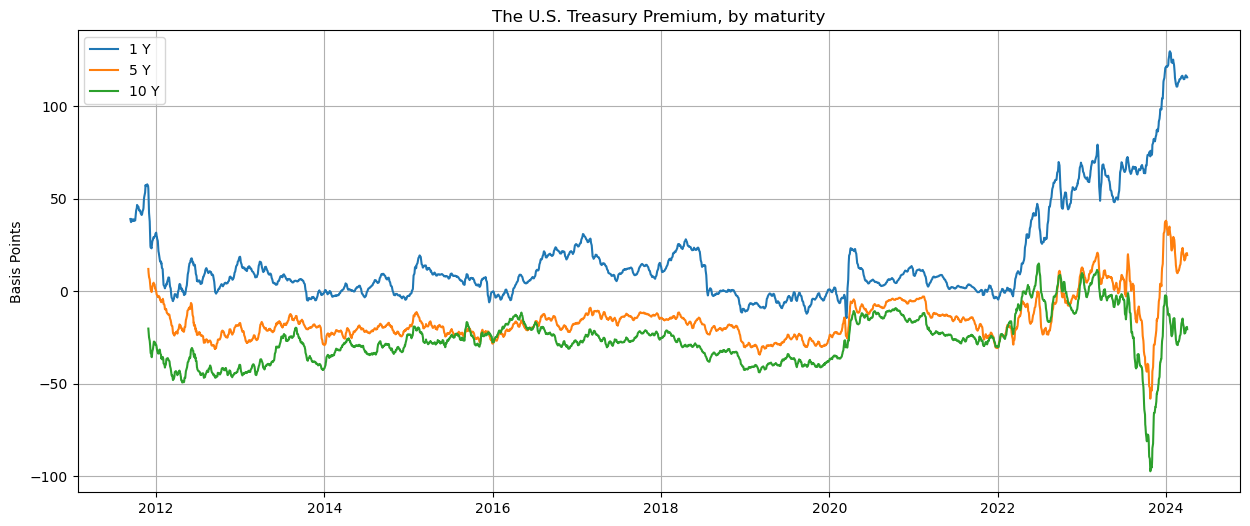

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(df_usd_1y['Timestamp'], df_usd_1y['ustp_mean'], label='1 Y')
plt.plot(df_usd_5y['Timestamp'], df_usd_5y['ustp_mean'], label='5 Y')
plt.plot(df_usd_10y['Timestamp'], df_usd_10y['ustp_mean'], label='10 Y')

plt.ylabel('Basis Points')
plt.title("The U.S. Treasury Premium, by maturity")
plt.legend()
plt.grid(True)

In [25]:
# Cross-country Mean 10 year US treasury premium: df_usd_10y['ustp_mean']

In [26]:
df_aus_5y['swap_spread'] = 100*(df_aus_5y['aud_irs'] - df_aus_5y['C1275Y Index'])
df_cad_5y['swap_spread'] = 100*(df_cad_5y['cad_irs'] - df_cad_5y['C1015Y Index'])
df_chf_5y['swap_spread'] = 100*(df_chf_5y['chf_irs'] - df_chf_5y['C2565Y Index'])
df_usd_5y['swap_spread'] = 100*(df_usd_5y['C0825Y Index'] - df_aus_5y['usd_irs'])
df_usd_5y['non_usd_ss'] = (df_aus_5y['swap_spread']+df_cad_5y['swap_spread']+df_chf_5y['swap_spread'])/3
# If it's not a numeric type, convert it to float
df_aus_5y['swap_spread'] = pd.to_numeric(df_aus_5y['swap_spread'], errors='coerce')
df_cad_5y['swap_spread'] = pd.to_numeric(df_cad_5y['swap_spread'], errors='coerce')
df_chf_5y['swap_spread'] = pd.to_numeric(df_chf_5y['swap_spread'], errors='coerce')
df_usd_5y['swap_spread'] = pd.to_numeric(df_usd_5y['swap_spread'], errors='coerce')
df_usd_5y['non_usd_ss'] = pd.to_numeric(df_usd_5y['non_usd_ss'], errors='coerce')

In [27]:
df_aus_5y['Timestamp'] = pd.to_datetime(df_aus_5y['Timestamp'])
df_cad_5y['Timestamp'] = pd.to_datetime(df_cad_5y['Timestamp'])
df_chf_5y['Timestamp'] = pd.to_datetime(df_chf_5y['Timestamp'])
df_usd_5y['Timestamp'] = pd.to_datetime(df_usd_5y['Timestamp'])
df_aus_5y.set_index('Timestamp', inplace=True)
df_cad_5y.set_index('Timestamp', inplace=True)
df_chf_5y.set_index('Timestamp', inplace=True)
df_usd_5y.set_index('Timestamp', inplace=True)

In [28]:
# In [1]: df_aus_5y['Timestamp'] = pd.to_datetime(df_aus_5y['Timestamp'])
#    ...: df_cad_5y['Timestamp'] = pd.to_datetime(df_cad_5y['Timestamp'])
#    ...: df_chf_5y['Timestamp'] = pd.to_datetime(df_chf_5y['Timestamp'])
#    ...: df_usd_5y['Timestamp'] = pd.to_datetime(df_usd_5y['Timestamp'])
#    ...: df_aus_5y.set_index('Timestamp', inplace=True)
#    ...: df_cad_5y.set_index('Timestamp', inplace=True)
#    ...: df_chf_5y.set_index('Timestamp', inplace=True)
#    ...: df_usd_5y.set_index('Timestamp', inplace=True)

In [29]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.sandwich_covariance import cov_hac
# Define the time periods
full_sample = ('2012', '2024-04-02')  # Adjust these dates as needed
period1 = ('2012', '2019')
period2 = ('2020', '2021')
period3 = ('2022', '2024-04-02')

# Function to calculate mean and standard deviation for a given period
# def calculate_stats(df, start_year, end_year):
#     period_df = df[start_year:end_year]
#     mean = period_df['swap_spread'].mean()
#     nw_se = sm.stats.newey_west(period_df['swap_spread'], lags=91)
#     return mean, nw_se
def calculate_stats(df, start_date, end_date):
    period_df = df.loc[start_date:end_date, 'swap_spread']
    mean = period_df.mean()
    model = OLS(period_df, np.ones_like(period_df)).fit()
    nw_cov = cov_hac(model, nlags=91)
    nw_se = np.sqrt(np.diag(nw_cov))
    return mean, nw_se[0]  # Only one regressor here, which is the constant term
# Apply the function to each DataFrame and time period
aus_full_mean, aus_full_ste = calculate_stats(df_aus_5y, *full_sample)
aus_period1_mean, aus_period1_ste = calculate_stats(df_aus_5y, *period1)
aus_period2_mean, aus_period2_ste = calculate_stats(df_aus_5y, *period2)
aus_period3_mean, aus_period3_ste = calculate_stats(df_aus_5y, *period3)

In [30]:
cad_full_mean, cad_full_ste = calculate_stats(df_cad_5y, *full_sample)
cad_period1_mean, cad_period1_ste = calculate_stats(df_cad_5y, *period1)
cad_period2_mean, cad_period2_ste = calculate_stats(df_cad_5y, *period2)
cad_period3_mean, cad_period3_ste = calculate_stats(df_cad_5y, *period3)

In [31]:
chf_full_mean, chf_full_ste = calculate_stats(df_chf_5y, *full_sample)
chf_period1_mean, chf_period1_ste = calculate_stats(df_chf_5y, *period1)
chf_period2_mean, chf_period2_ste = calculate_stats(df_chf_5y, *period2)
chf_period3_mean, chf_period3_ste = calculate_stats(df_chf_5y, *period3)

In [32]:
usd_full_mean, usd_full_ste = calculate_stats(df_usd_5y, *full_sample)
usd_period1_mean, usd_period1_ste = calculate_stats(df_usd_5y, *period1)
usd_period2_mean, usd_period2_ste = calculate_stats(df_usd_5y, *period2)
usd_period3_mean, usd_period3_ste = calculate_stats(df_usd_5y, *period3)

In [33]:
def calculate_stats_nonusd(df, start_date, end_date):
    period_df = df.loc[start_date:end_date, 'non_usd_ss']
    mean = period_df.mean()
    model = OLS(period_df, np.ones_like(period_df)).fit()
    nw_cov = cov_hac(model, nlags=91)
    nw_se = np.sqrt(np.diag(nw_cov))
    return mean, nw_se[0]  # Only one regressor here, which is the constant term
nonusd_full_mean, nonusd_full_ste = calculate_stats_nonusd(df_usd_5y, *full_sample)
nonusd_period1_mean, nonusd_period1_ste = calculate_stats_nonusd(df_usd_5y, *period1)
nonusd_period2_mean, nonusd_period2_ste = calculate_stats_nonusd(df_usd_5y, *period2)
nonusd_period3_mean, nonusd_period3_ste = calculate_stats_nonusd(df_usd_5y, *period3)

In [34]:
results = {
    'AUD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'CAD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'CHF': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'NON_USD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
    'USD': {'full_sample': None, '2012_2019': None, '2020_2021': None, '2022_2024': None},
}
results['AUD']['full_sample'] = {'Mean': aus_full_mean, 'Std Error': aus_full_ste}
results['AUD']['2012_2019'] = {'Mean': aus_period1_mean, 'Std Error': aus_period1_ste}
results['AUD']['2020_2021'] = {'Mean': aus_period2_mean, 'Std Error': aus_period2_ste}
results['AUD']['2022_2024'] = {'Mean': aus_period3_mean, 'Std Error': aus_period3_ste}

results['CAD']['full_sample'] = {'Mean': cad_full_mean, 'Std Error': cad_full_ste}
results['CAD']['2012_2019'] = {'Mean': cad_period1_mean, 'Std Error': cad_period1_ste}
results['CAD']['2020_2021'] = {'Mean': cad_period2_mean, 'Std Error': cad_period2_ste}
results['CAD']['2022_2024'] = {'Mean': cad_period3_mean, 'Std Error': cad_period3_ste}

results['CHF']['full_sample'] = {'Mean': chf_full_mean, 'Std Error': chf_full_ste}
results['CHF']['2012_2019'] = {'Mean': chf_period1_mean, 'Std Error': chf_period1_ste}
results['CHF']['2020_2021'] = {'Mean': chf_period2_mean, 'Std Error': chf_period2_ste}
results['CHF']['2022_2024'] = {'Mean': chf_period3_mean, 'Std Error': chf_period3_ste}

results['NON_USD']['full_sample'] = {'Mean': nonusd_full_mean, 'Std Error': nonusd_full_ste}
results['NON_USD']['2012_2019'] = {'Mean': nonusd_period1_mean, 'Std Error': nonusd_period1_ste}
results['NON_USD']['2020_2021'] = {'Mean': nonusd_period2_mean, 'Std Error': nonusd_period2_ste}
results['NON_USD']['2022_2024'] = {'Mean': nonusd_period3_mean, 'Std Error': nonusd_period3_ste}

results['USD']['full_sample'] = {'Mean': usd_full_mean, 'Std Error': usd_full_ste}
results['USD']['2012_2019'] = {'Mean': usd_period1_mean, 'Std Error': usd_period1_ste}
results['USD']['2020_2021'] = {'Mean': usd_period2_mean, 'Std Error': usd_period2_ste}
results['USD']['2022_2024'] = {'Mean': usd_period3_mean, 'Std Error': usd_period3_ste}

In [35]:
# Convert the nested dictionary to a DataFrame
df_results = pd.DataFrame.from_dict({(i,j): results[i][j]
                                     for i in results.keys()
                                     for j in results[i].keys()},
                                     orient='index')

# Give proper names to the multi-level index
df_results.index.names = ['Currency', 'Period']

# Reset the index if you prefer that format
df_results.reset_index(inplace=True)

# Rename columns to match the table format in the image
df_results.columns = ['Currency', 'Period', 'Mean', 'Std Error']

In [36]:
from tabulate import tabulate

print(tabulate(df_results, headers='keys', tablefmt='grid'))

+----+------------+-------------+------------+-------------+
|    | Currency   | Period      |       Mean |   Std Error |
+====+============+=============+============+=============+
|  0 | AUD        | full_sample |  33.3028   |     3.29037 |
+----+------------+-------------+------------+-------------+
|  1 | AUD        | 2012_2019   |  35.503    |     3.9633  |
+----+------------+-------------+------------+-------------+
|  2 | AUD        | 2020_2021   |  11.1187   |     3.79876 |
+----+------------+-------------+------------+-------------+
|  3 | AUD        | 2022_2024   |  45.2457   |     3.84815 |
+----+------------+-------------+------------+-------------+
|  4 | CAD        | full_sample |  36.4971   |     1.13828 |
+----+------------+-------------+------------+-------------+
|  5 | CAD        | 2012_2019   |  33.3004   |     1.1742  |
+----+------------+-------------+------------+-------------+
|  6 | CAD        | 2020_2021   |  41.0045   |     1.45307 |
+----+------------+-----

In [39]:
df_usd_5y['swap_spread']

Timestamp
2000-01-03      NaN
2000-01-04      NaN
2000-01-05      NaN
2000-01-06      NaN
2000-01-07      NaN
              ...  
2024-03-28   -20.31
2024-03-29   -20.31
2024-04-01   -20.31
2024-04-02   -20.31
2024-04-03      NaN
Name: swap_spread, Length: 6328, dtype: float64